# HW 8 - Random Numbers

a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dice.


b) Modify your program to simulate the rolling of two dice a million times (N0) and count the number of times you get double six (N1). Calculate the probability of finding double six in your simulations (N1/N0)


In [329]:
# Ascano, Ronaldo
# due 10.24.18

import numpy as np
from numba import jit
import random
import matplotlib.pyplot as plt

# this program will simulate rolling a pair of dice N times and will count
# how many double 6s are rolled to calculate its probability.

@jit
def dice_roll_prob_simulator(N0):     # where N0 is the number of dice rolls we want to simulate
    
    N1 = 0                            # where N1 is the number of double 6s
    
    for i in range(N0+1):  
        
        np.random.seed(i)
        pair_of_dice_values = np.random.randint(1,7,2)          # generates 2 random numbers between 1-6
        
        if sum(pair_of_dice_values) == 12:
            N1 += 1
        
    P = N1/N0
        
    return P

In [330]:
print('The probability of landing double 6s out of a million dice rolls is:',
      dice_roll_prob_simulator(1000000))

The probability of landing double 6s out of a million dice rolls is: 0.027895


----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
c) Write a code to generate random integers within [-5, 5], find the magic series of {a, c, m} [Don't use the built-in function in numpy]

In [262]:
# numpy way

for j in range(50):
    np.random.seed(j)
    a = np.random.randint(-5,6)
    print(a, end=', ')

0, 0, 3, 5, 5, -2, 5, -1, -2, 0, 4, 4, 1, -3, 3, 3, 4, -4, 5, 0, -2, 4, 0, -2, -3, -1, 0, -2, -4, 0, 0, -3, 2, -1, -4, 4, 0, 0, -4, 4, 1, -5, 1, -1, -1, -2, 0, 2, -5, 5, 

In [324]:
# non-numpy way
# linear congruential random number generator


def uniform_random_number_generator(N):
    
    results = []
    a = 7**143
    c = 1
    m = 6
    x = 2

    for i in range(N):      
        x = (a*x+c)%m
        results.append(x)
        results[:] = [random.choice([-1,1])*x for x in results]     #randomly multiplies 1 or -1 to array elements
        
    random.shuffle(results)
    plt.plot(results,"o")
    plt.show()

    plt.hist(results, bins=50)
    plt.show()
    
    return len(results), results

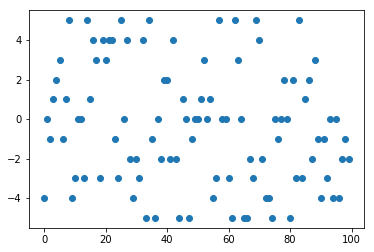

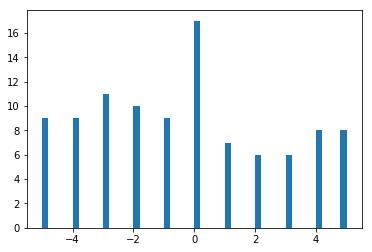

(100, [-4, 0, -1, 1, 2, 3, -1, 1, 5, -4, -3, 0, 0, -3, 5, 1, 4, 3, -3, 4, 3, 4, 4, -1, -3, 5, 0, 4, -2, -4, -2, -3, 4, -5, 5, -1, -5, 0, -2, 2, 2, -2, 4, -2, -5, 1, 0, -5, -1, 0, 0, 1, 3, 0, 1, -4, -3, 5, 0, 0, -3, -5, 5, 3, 0, -5, -5, -2, -3, 5, 4, -2, -4, -4, -5, 0, -1, 0, 2, 0, -5, 2, -3, 5, -3, 1, 2, -2, 3, -1, -4, -1, -3, 0, -4, 0, -4, -2, -1, -2])


In [325]:
print(uniform_random_number_generator(100))

In [327]:
# non-numpy way
# using 'random.choice'

array = [-5,-4,-3,-2,-1,0,1,2,3,4,5]

@jit
def generate_random_numbers_between_neg5_and_pos5(M):
    
    random_array = []

    for i in range(M):
        random_pick = random.choice(array)
        random_array.append(random_pick)
    
    plt.plot(random_array,"o")
    plt.show()

    plt.hist(random_array, bins=50)
    plt.show()
    
    return len(random_array), random_array

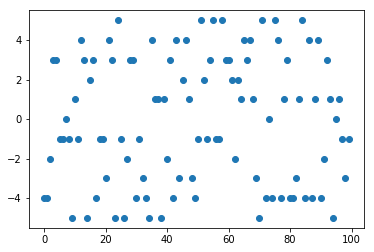

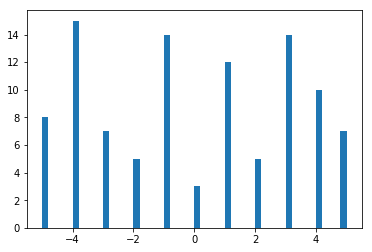

(100, [-4, -4, -2, 3, 3, -1, -1, 0, -1, -5, 1, -1, 4, 3, -5, 2, 3, -4, -1, -1, -3, 4, 3, -5, 5, -1, -5, -2, 3, 3, -4, -1, -3, -4, -5, 4, 1, 1, -5, 1, -2, 3, -4, 4, -3, 2, 4, 1, -3, -4, -1, 5, 2, -1, 3, 5, -1, -1, 5, 3, 3, 2, -2, 2, 1, 4, 3, 4, 1, -3, -5, 5, -4, 0, -4, 5, 4, -4, 1, 3, -4, -4, -3, 1, 5, -4, 4, -4, 1, 4, -4, -2, 3, 1, -5, 0, 1, -1, -3, -1])


In [328]:
print(generate_random_numbers_between_neg5_and_pos5(100))